<a href="https://colab.research.google.com/github/HungPham2002/Visual-Prompting-with_Landing.AI/blob/main/Visual_Prompting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install landingai

  Using cached landingai-0.3.36-py3-none-any.whl (1.0 MB)
  Using cached aiofiles-0.8.0-py3-none-any.whl (13 kB)
  Using cached bbox_visualizer-0.1.0-py2.py3-none-any.whl (6.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.6/276.6 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 40.1 MB/s eta 0:00:00
  Using cached python_dotenv-1.0.1-py3-none-any.whl (19 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 kB 20.4 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.6.4
    Uninstalling pydantic-2.6.4:
      Successfully uninstalled pydantic-2.6.4
  Attempting uninstall: pandas
    F

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Test Image

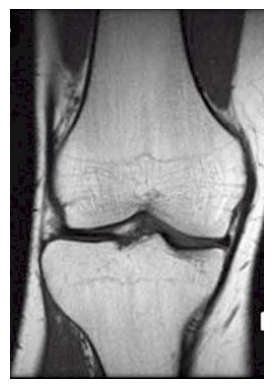

In [61]:
image_path = '/content/perfect_test.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(image)

# Call the Visual Prompting API

In [62]:
from PIL import Image
from landingai.predict import Predictor

endpoint_id = "65bb197d-11b3-4927-9b34-a32561d04d82"
api_key = "land_sk_jP1pPSXQZseaTPRhdivUusAgmyWqJG8alIrJ22Om0skvAyShav"

image = Image.open(image_path)

predictor = Predictor(endpoint_id, api_key=api_key)
predictions = predictor.predict(image)

In [63]:
predictions

[SegmentationPrediction(score=1.0, label_name='Femur', label_index=1, id='23369765-7008-3652-10e6-122c36ca5baa', encoded_mask='161Z6N248Z2N175Z29N28Z1N7Z1N3Z2N177Z75N175Z75N175Z75N175Z75N175Z76N174Z76N174Z76N173Z77N173Z77N173Z77N173Z78N172Z78N172Z78N171Z79N171Z79N171Z79N171Z80N170Z80N170Z80N169Z81N169Z81N169Z82N168Z82N168Z82N167Z83N167Z83N167Z83N167Z84N166Z84N166Z84N166Z84N165Z85N165Z85N165Z86N164Z86N164Z86N164Z86N164Z86N164Z87N163Z87N163Z87N163Z88N161Z89N161Z89N161Z89N161Z89N161Z90N160Z90N159Z91N159Z92N158Z92N157Z93N157Z93N157Z94N156Z94N156Z94N156Z95N155Z95N155Z95N155Z95N154Z97N153Z97N153Z97N153Z98N151Z99N151Z100N150Z100N150Z100N150Z101N149Z101N149Z101N148Z103N147Z103N146Z104N146Z105N145Z105N145Z105N145Z106N144Z106N143Z108N142Z108N142Z108N142Z110N139Z111N139Z112N138Z112N137Z114N136Z114N136Z115N135Z115N134Z117N133Z117N132Z119N131Z119N131Z121N128Z122N128Z123N126Z124N126Z125N124Z127N123Z127N123Z128N122Z129N120Z131N119Z131N118Z134N116Z134N115Z136N114Z137N112Z139N111Z140N109Z142N108Z143N10

# Display the predicion

In [64]:
import numpy as np
import re

def decode_bitmap_rle(bitmap, encoding_map):
  flat_mask = np.array([])
  bitmap_list = re.split("(Z|N)", bitmap)
  for num, map_letter in zip(*[iter(bitmap_list)] * 2):
    map_number = encoding_map[map_letter]
    flat_mask = np.append(flat_mask, [int(map_number)] * int(num))
  return flat_mask

def get_array_from_response(predictions):
  # predictions = response["predictions"]
  height, width = predictions[0].mask_shape
  class_mask_femur = np.zeros((height, width), dtype=np.int64)
  class_mask_tabia = np.zeros((height, width), dtype=np.int64)
  class_mask_background = np.zeros((height, width), dtype=np.int64)
  index = 0
  for bitmap_info in predictions:
    encoding_map = bitmap_info.encoding_map
    label_index = bitmap_info.label_index
    rle = bitmap_info.encoded_mask
    flat_binary_mask = decode_bitmap_rle(rle, encoding_map).astype(bool)
    binary_mask = flat_binary_mask.reshape((height, width))
    if index == 0:
      class_mask_femur += binary_mask * label_index
    elif index == 1:
      class_mask_tabia += binary_mask * label_index
    elif index == 2:
      class_mask_background += binary_mask * label_index
    index += 1
  return class_mask_femur, class_mask_tabia, class_mask_background

prediction_femur, prediction_tabia, prediction_bg = get_array_from_response(predictions)
print(prediction_femur.shape, prediction_tabia.shape, prediction_bg.shape)
np.unique(prediction_femur), np.unique(prediction_tabia), np.unique(prediction_bg)

(364, 250) (364, 250) (364, 250)


(array([0, 1]), array([0, 2]), array([0, 3]))

In [65]:
prediction = np.maximum.reduce([prediction_femur, prediction_tabia, prediction_bg])
print(prediction.shape)
print(np.unique(prediction))

(364, 250)
[1 2 3]


In [66]:
PALETTE = [
    (0,0,0),
    (125,23,118),
    (255,255,0),
    (0,255,255),
    (255,0,255),
    (0,0,255),
    (255,143,32),
    (173,46,36),
    (71,4,0),
    (207,204,0),
    (167,209,65),
    (65,209,179),
    (112,233,255),
    (0,172,237),
]
def color_prediction(prediction, palette):
  prediction = prediction.astype(np.uint8)
  max_num_classes = np.max(prediction) + 1
  if max_num_classes > len(palette):
    print(
        f'Warningg: palette has {len(palette)} colors, but prediction can have up to {max_num_classes}'
    )
  if len(palette) < 256:
    padded_palette = palette + [(0,0,0)] * (256-len(palette))
  else:
    padded_palette = palette
  lut = np.array(padded_palette, np.uint8)
  viz_r = cv2.LUT(prediction, lut[:,0])
  viz_g = cv2.LUT(prediction, lut[:,1])
  viz_b = cv2.LUT(prediction, lut[:,2])
  viz_rgb = np.dstack([viz_r, viz_g, viz_b])
  return viz_rgb

colored_prediction = color_prediction(prediction, PALETTE)

In [67]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image.shape

(364, 250, 3)

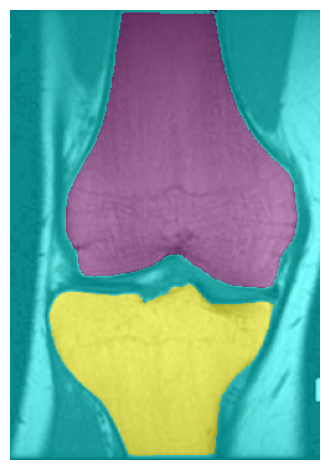

In [68]:
import matplotlib.pyplot as plt

def visualize_image(img, fig, ax , show_colorbar=False, title=None, **kwargs):
  im = ax.imshow(img, **kwargs)
  ax.set_yticklabels([])
  ax.set_yticks([])
  ax.set_xticklabels([])
  ax.set_xticks([])
  ax.axis('off')
  if show_colorbar:
    plt.colorbar(im, orientation='vertical')
  if title is not None:
    plt.title(title)
  plt.tight_layout()

# image = np.array(image)
overlay = cv2.addWeighted(image, 0.5, colored_prediction, 0.5, 0)
fig, ax = plt.subplots()
visualize_image(overlay, fig, ax)


In [75]:
prompt_path = '/content/drive/MyDrive/visual prompting/prompt.jpg'
prompt = cv2.imread(prompt_path)
prompt = cv2.cvtColor(prompt,cv2.COLOR_BGR2RGB)
result_path = '/content/drive/MyDrive/visual prompting/result.png'
result = cv2.imread(result_path)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

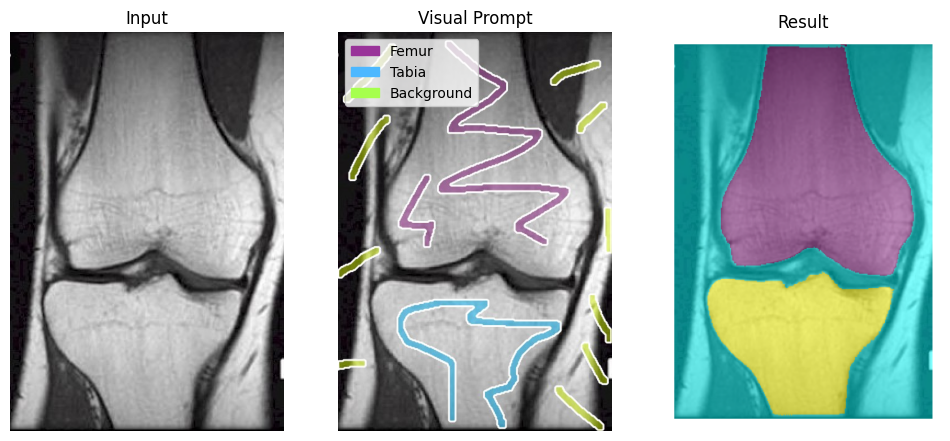

In [80]:
plt.figure(figsize=(12,36))
plt.subplot(1,3,1)
plt.title('Input')
plt.imshow(image)
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Visual Prompt')
plt.imshow(prompt)
plt.axis('off')
plt.legend(handles=[plt.Rectangle((0,0),1,1, color='#993399', label='Femur'),
                    plt.Rectangle((0,0),1,1, color='#4db8ff', label='Tabia'),
                    plt.Rectangle((0,0),1,1, color='#a6ff4d', label='Background')],
               loc='upper left')

plt.subplot(1,3,3)
plt.title('Result')
plt.imshow(result)
plt.axis('off')

plt.show()